# Important!
The two .csv files necessary to run the notebook are "movies.csv" and "oscar.csv" are too big to upload directly to GitHub and can be downloaded here: https://www.kaggle.com/datasets/vinifm/female-representation-in-cinema

Direct download link: https://www.kaggle.com/datasets/vinifm/female-representation-in-cinema/download?datasetVersionNumber=2

In [101]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import sys
import csv

# Women in Cinema

In this document I wanted to find out more about Oscar-nominated and Oscar-winning films and their portrayal of women. For this I used two data sets:<br>
The first being about female represantion in Cinema through Bechdel test scores and cast/crew gender ratios.The second data set, oscars.csv displays Academy Award winners and <br>
nominees from 1927 to 2021. <br>
Oscars.csv considered the following categories: <br>
DIRECTING, BEST PICTURE, FILM EDITING, WRITING, COSTUME DESIGN, DOCUMENTARY, CINEMATOGRAPHY and SHORT FILM <br><br><br>

##### Why I chose these data sets:

I have a bachelor's degree in Theatre- Film- and Mediastudies and thus have an interest in this topic. As I have never used data visualization and code to research questions<br> regarding film and gender it was interesting to see how one could combine film studies and Digital Humanities to work with bigger sets of data and represent ones findings. <br> <br>
While I am aware that the Bechdel test is not the most exact method to research female representation on screen, it is the only one I know that can be analyzed that way as other <br> methods tend to produce more qualitative, non-standardized data.

#### First steps:

At first I had to import the data sets and create first (basic) dictionaries and lists to work with.

In [5]:
#reads movies.csv but had to increase field size limit
from csv import reader
csv.field_size_limit(100000000)
opened_file = open('movies.csv', encoding='utf8')
read_file = reader(opened_file)
movie_data = list(read_file)

In [6]:
#reads oscar.csv
opened_file = open('oscar.csv', encoding='utf8')
from csv import reader
read_file = reader(opened_file)
oscar_data = list(read_file)

In [7]:
#list of every movie title in movies.csv
movie_titles = []
for row in movie_data[1:]:
    titles = str (row[1])
    movie_titles.append(titles)

In [8]:
#dictionary of year and movie title in movies.csv
year_title = {}

for row in movie_data:
        year = row[2] 
        title = row[1] 

        if year in year_title:
            year_title[year].append(title)
        else:
            year_title[year] = [title]

#### Trying out new things:

Before I attempted to answer questions that require more steps I tested working with the data sets by coding some simple requests such as printing every title in movies.csv that came out in the years 1990, 1991 and 1992.

In [9]:
#print every title that came out in the years 1990, 1991 and 1992
years_of_interest = ['1990', '1991', '1992']

for year in years_of_interest:
    if year in year_title:
        print(f"{year}: {year_title[year]}") 
    else:
        print(f"No movies found for {year}")

1990: ['Home Alone', 'Mermaids', 'Postcards From the Edge', 'Life Is Sweet', 'La Femme Nikita', "The Handmaid's Tale", 'Mindwalk', 'Ghost', 'Paris Is Burning', 'Tremors', 'I, the Worst of All', 'Pretty Woman', 'GoodFellas', 'An Angel at My Table', 'Edward Scissorhands', 'Flatliners', 'Die Hard 2', 'Happily Ever After', 'The Long Walk Home', 'The Company of Strangers', 'I Love You to Death', "Child's Play 2", 'Troll 2', 'A Tale of Springtime', 'The Match Factory Girl', 'Welcome Home, Roxy Carmichael', 'Where the Heart Is', 'Alice', 'Criminal Justice', 'Kindergarten Cop', 'Cry-Baby', 'The Nasty Girl', 'Hidden Agenda', 'The Godfather: Part III', 'Metropolitan', 'Barbarian Queen II: The Empress Strikes Back', 'Nightbreed', 'The Bonfire of the Vanities', 'Wild at Heart', 'Joe Versus the Volcano', 'Predator 2', 'Teenage Mutant Ninja Turtles', 'Europa Europa', 'Stella', 'Class of 1999', 'Gremlins 2: The New Batch', 'Misery', 'White Hunter, Black Heart', 'The Hunt for Red October', 'Close-Up',

#### Gender ratio of the crew:

After this worked out, I moved on to focus more on my main research question, namely the representation of women in cinema. <br>
At first I mainly wanted to see, what data I had and how to use it. <br>
Thus I tried finding the percentage of female crew workes for every movie in movies.csv that came out in 2010. <br>
I then created five categories to visualize the results in a pie chart.

In [10]:
#list of percentages of women in the production crew for every movie in movies.csv in 2010
fem_percent_2010 = []
for row in movie_data[2586:2771]:
    percentage = str(row[21])
    fem_percent_2010.append(percentage)

In [11]:
print(fem_percent_2010)

['8.370044052863436', '14.093959731543624', '0.0', '22.78481012658228', '5.666666666666666', '7.317073170731707', '22.058823529411764', '19.35483870967742', '25.0', '7.64872521246459', '12.244897959183673', '33.33333333333333', '21.428571428571427', '12.017167381974248', '28.57142857142857', '40.0', '28.125', '15.0', '30.76923076923077', '4.5662100456621', '4.545454545454546', '9.523809523809524', '19.11764705882353', '17.647058823529413', '20.754716981132077', '8.860759493670885', '26.666666666666668', '20.0', '5.263157894736842', '9.947643979057592', '11.875', '28.57142857142857', '50.0', '13.114754098360656', '5.2356020942408374', '5.286343612334802', '12.121212121212121', '25.0', '10.0', '6.382978723404255', '14.583333333333334', '16.666666666666664', '8.0', '20.0', '0.0', '11.76470588235294', '43.47826086956522', '20.0', '31.25', '0.0', '14.285714285714285', '17.543859649122805', '12.76595744680851', '0.0', '18.0', '35.13513513513514', '10.0', '52.63157894736842', '7.3529411764705

In [12]:
#changing str to int in the fem_percent_2010 list
int_fem_2010 = fem_percent_2010
res = [eval(i) for i in int_fem_2010]
print("Modified list is: ", res)

Modified list is:  [8.370044052863436, 14.093959731543624, 0.0, 22.78481012658228, 5.666666666666666, 7.317073170731707, 22.058823529411764, 19.35483870967742, 25.0, 7.64872521246459, 12.244897959183673, 33.33333333333333, 21.428571428571427, 12.017167381974248, 28.57142857142857, 40.0, 28.125, 15.0, 30.76923076923077, 4.5662100456621, 4.545454545454546, 9.523809523809524, 19.11764705882353, 17.647058823529413, 20.754716981132077, 8.860759493670885, 26.666666666666668, 20.0, 5.263157894736842, 9.947643979057592, 11.875, 28.57142857142857, 50.0, 13.114754098360656, 5.2356020942408374, 5.286343612334802, 12.121212121212121, 25.0, 10.0, 6.382978723404255, 14.583333333333334, 16.666666666666664, 8.0, 20.0, 0.0, 11.76470588235294, 43.47826086956522, 20.0, 31.25, 0.0, 14.285714285714285, 17.543859649122805, 12.76595744680851, 0.0, 18.0, 35.13513513513514, 10.0, 52.63157894736842, 7.352941176470589, 15.277777777777779, 18.0, 8.488063660477453, 11.76470588235294, 1.282051282051282, 16.07142857

In [13]:
#how many films had x% of female crew
numbers = res

below_20_count = 0
between_20_and_40_count = 0
between_40_and_60_count = 0
between_60_and_80_count = 0
between_80_and_100_count = 0

for num in numbers:
    if num < 20:
        below_20_count += 1
    elif 20 <= num < 40:
        between_20_and_40_count += 1
    elif 40 <= num < 60:
        between_40_and_60_count += 1
    elif 60 <= num < 80:
        between_60_and_80_count += 1
    elif 80 <= num <= 100:
        between_80_and_100_count += 1

print("Numbers below 20:", below_20_count)
print("Numbers between 20 and 40:", between_20_and_40_count)
print("Numbers between 40 and 60:", between_40_and_60_count)
print("Numbers between 60 and 80:", between_60_and_80_count)
print("Numbers between 80 and 100:", between_80_and_100_count)

Numbers below 20: 120
Numbers between 20 and 40: 52
Numbers between 40 and 60: 9
Numbers between 60 and 80: 1
Numbers between 80 and 100: 3


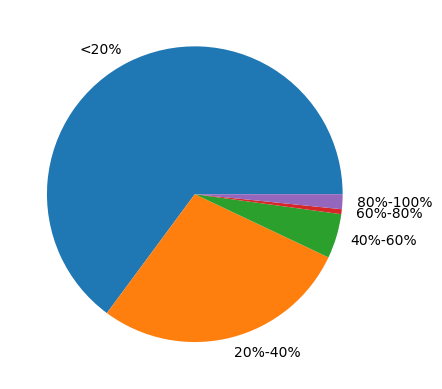

In [14]:
#pie chart of percentage of female film crew for the films of 2010 in movies.csv

y = np.array([below_20_count, between_20_and_40_count, between_40_and_60_count, between_60_and_80_count, between_80_and_100_count])
mylabels = ["<20%", "20%-40%", "40%-60%", "60%-80%", "80%-100%"]

plt.pie(y, labels=mylabels)
plt.show() 




[120, 52, 9, 1, 3]
['<20% women in the film-crew', '20%-40% women in the film-crew', '40%-60% women in the film-crew', '60%-80% women in the film-crew', '80%-100% women in the film-crew']


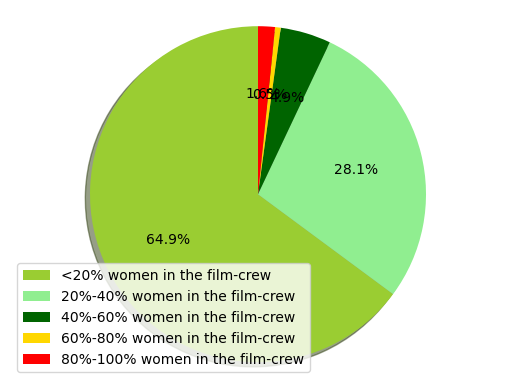

In [15]:
#pie chart of percentage of female film crew for the films of 2010 in movies.csv
#tried to get the percantages outside of the pie chart but got a "disastrous" result for every attempt
#experimented with color and visual aspects

import matplotlib.pyplot as plt
topic = ["<20% women in the film-crew", "20%-40% women in the film-crew", "40%-60% women in the film-crew", "60%-80% women in the film-crew", "80%-100% women in the film-crew"]
Postive_percentage = [below_20_count, between_20_and_40_count, between_40_and_60_count, between_60_and_80_count, between_80_and_100_count]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
print(labels)
colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(sizes, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

## Bechdel scores - Comparing different eras

This is where I started actually working with the Bechdel score. <br>
I created a list with Bechdel scores from movies that came out from 1970 to 2020 and another list for movies from 1900 to 1950 <br>
to compare the findings. <br>
After putting both sets of data in a bar diagram I quickly realized that - as far fewer movies came out dirong the earlier part of the 20th century - <br>
the two data sets were not comparable as is so I had to normalize the numbers to create a relative comparison. <br>

### 1970-2020

In [16]:
#putting every film title from the years 2000-2010 in a list#

films_2000_2010 = []

for row in movie_data[1:]:
    title = row[1]  
    year = row[2]   

    if 2000 <= int(year) <= 2010:
        films_2000_2010.append(title)

In [17]:
#selecting only the bechdel test score for movies between 1970 and 2020

bechdel_scores_1970_2020 = []

for row in movie_data[1:]:
    year = int(row[2])
    bechdel_score = int(row[3])  

    if 1970 <= year <= 2020:
        bechdel_scores_1970_2020.append(bechdel_score)

In [18]:
#how often each score is in the list
numbers = bechdel_scores_1970_2020

bs_0 = 0
bs_1 = 0
bs_2 = 0
bs_3 = 0

for num in numbers:
    if num == 0:
        bs_0 += 1
    elif num == 1:
        bs_1 += 1
    elif num == 2:
        bs_2 += 1
    elif num == 3:
        bs_3 += 1

print("How many films failed the Bechdel test:", bs_0)
print("How many films had at least two named women in it:", bs_1)
print("How many films had two named women that talked to each other:", bs_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bs_3)

How many films failed the Bechdel test: 552
How many films had at least two named women in it: 1452
How many films had two named women that talked to each other: 612
How many films had two named women that talked to each other about anything that isn't a man: 3553


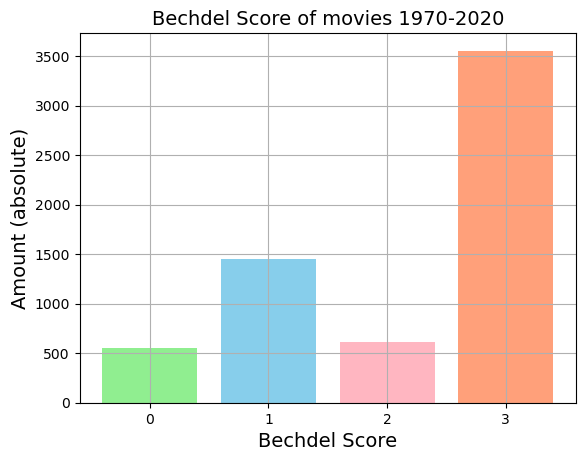

In [19]:
#bar diagram about the bechdel scores 1970-2020

data = {'Bechdel Score': ['0', '1', '2', '3'],
        'Amount': [bs_0, bs_1, bs_2, bs_3]
       }
df = pd.DataFrame(data)

colors = ['lightgreen','skyblue','lightpink','lightsalmon']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score of movies 1970-2020', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

### 1900-1950

In [20]:
#selecting only the bechdel test score for movies between 1900 and 1950

bechdel_scores_1900_1950 = []

for row in movie_data[1:]:
    year = int(row[2])
    bechdel_score = int(row[3])  

    if 1900 <= year <= 1950:
        bechdel_scores_1900_1950.append(bechdel_score)

In [21]:
#how often each score is in the list
numbers = bechdel_scores_1900_1950

bs_0_19 = 0
bs_1_19 = 0
bs_2_19 = 0
bs_3_19 = 0

for num in numbers:
    if num == 0:
        bs_0_19 += 1
    elif num == 1:
        bs_1_19 += 1
    elif num == 2:
        bs_2_19 += 1
    elif num == 3:
        bs_3_19 += 1

print("How many films failed the Bechdel test:", bs_0_19)
print("How many films had at least two named women in it:", bs_1_19)
print("How many films had two named women that talked to each other:", bs_2_19)
print("How many films had two named women that talked to each other about anything that isn't a man:", bs_3_19)

How many films failed the Bechdel test: 106
How many films had at least two named women in it: 91
How many films had two named women that talked to each other: 86
How many films had two named women that talked to each other about anything that isn't a man: 213


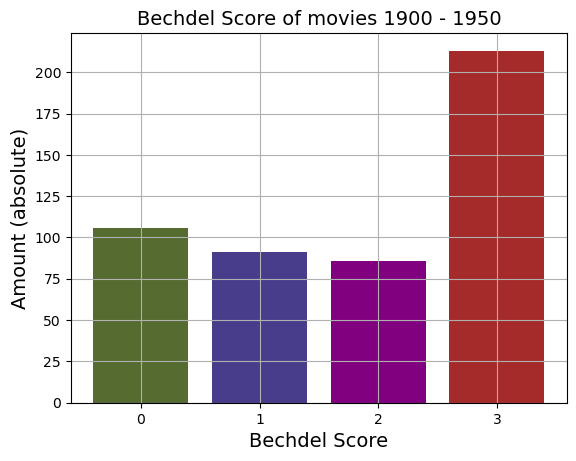

In [22]:
#bar diagram about the bechdel scores 1900 and 1950

data = {'Bechdel Score': ['0', '1', '2', '3'],
        'Amount': [bs_0_19, bs_1_19, bs_2_19, bs_3_19]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','darkslateblue','purple','brown']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score of movies 1900 - 1950', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

### Comparing the results

My hypothesis that the relative amount of films that had a Bechdel score of 3 (having two named women that at one point talk to each other about something <br>
other than a man is higher in the 1970-2020 bracket than the 1900-1950 one was proven right. 

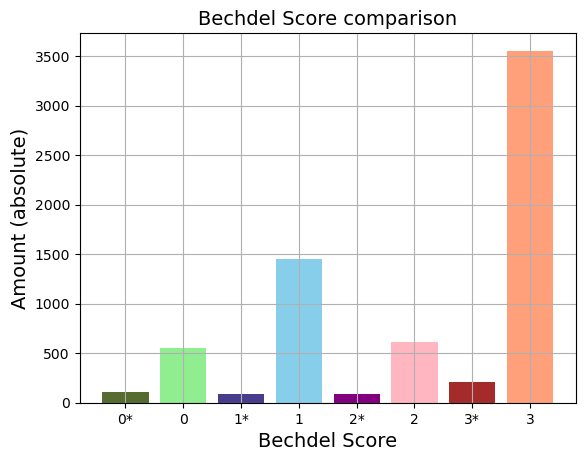

In [23]:
#bar diagram comparing the two visualizations

data = {'Bechdel Score': ['0*', '0', '1*', '1', '2*', '2', '3*', '3'],
        'Amount': [bs_0_19, bs_0, bs_1_19, bs_1, bs_2_19, bs_2, bs_3_19, bs_3]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','lightgreen','darkslateblue','skyblue','purple','lightpink','brown', 'lightsalmon']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score comparison', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

In [24]:
#conclusion: not enought films in the first list from 1900-1950 which makes the comparison rather meaningless
#maybe with perceentages it would be a better diagram

In [25]:
total_count = bs_0 + bs_1 + bs_2 + bs_3
total_count_19 = bs_0_19 + bs_1_19 + bs_2_19 + bs_3_19

In [26]:
normalized_bs_0_19 = bs_0_19 / total_count_19
normalized_bs_0 = bs_0 / total_count
normalized_bs_1_19 = bs_1_19 / total_count_19
normalized_bs_1 = bs_1 / total_count
normalized_bs_2_19 = bs_2_19 / total_count_19
normalized_bs_2 = bs_2 / total_count
normalized_bs_3_19 = bs_3_19 / total_count_19
normalized_bs_3 = bs_3 / total_count

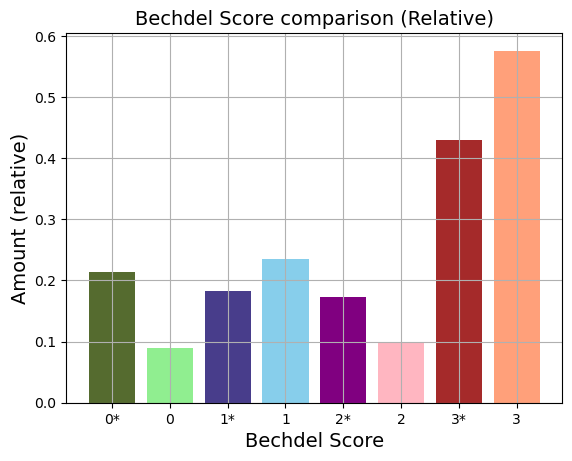

In [27]:
data = {'Bechdel Score': ['0*', '0', '1*', '1', '2*', '2', '3*', '3'],
        'Percent': [normalized_bs_0_19, normalized_bs_0, normalized_bs_1_19, normalized_bs_1,
                   normalized_bs_2_19, normalized_bs_2, normalized_bs_3_19, normalized_bs_3]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','lightgreen','darkslateblue','skyblue','purple','lightpink','brown', 'lightsalmon']

plt.bar(df['Bechdel Score'], df['Percent'], color=colors)
plt.title('Bechdel Score comparison (Relative)', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (relative)', fontsize=14)
plt.grid(True)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
<tr>
<td><strong>asterisk</strong></td>
<td>Value 1900-1950</td>
</tr>
<tr>
<td><strong>no asterisk</strong></td>
<td>Value 1970-2020</td>
</tr>
</tbody>
</table>

## Bechdel scores - Oscar Winners 

As I moved on to working with both data sets, oscars.csv and movies.csv I first had to find the matching_entries, movies which appear in both data sets. <br>
<br>
Here the topic of interest was the Bechdel score of Oscar winners in general, no matter the winning category. <br>


In [42]:
#finding out if the oscar winners pass the bechdel test - and what score they got
#first step was creating a list of the oscar winners as the file also includes nominees:

def get_data_for_status(file_path, status_column, target_status):
    df = pd.read_csv(file_path)
    
    filtered_rows = df[df[status_column] == target_status]
    
    result_list = filtered_rows.to_dict(orient='records')
    
    return result_list

file_path = 'oscar.csv'  # replace with the actual file path
status_column = 'status'  # replace with the actual column name
target_status = 'winner'

oscar_winners = get_data_for_status(file_path, status_column, target_status)

for entry in oscar_winners:
    print(entry)

{'year': 1927, 'category': 'WRITING', 'film': 'Underworld', 'name': 'Ben Hecht', 'status': 'winner', 'gender': 'male'}
{'year': 1927, 'category': 'WRITING', 'film': '7th Heaven', 'name': 'Benjamin Glazer', 'status': 'winner', 'gender': 'male'}
{'year': 1927, 'category': 'CINEMATOGRAPHY', 'film': 'Sunrise', 'name': 'Charles Rosher', 'status': 'winner', 'gender': 'male'}
{'year': 1927, 'category': 'DIRECTING', 'film': '7th Heaven', 'name': 'Frank Borzage', 'status': 'winner', 'gender': 'male'}
{'year': 1927, 'category': 'DIRECTING', 'film': 'Two Arabian Knights', 'name': 'Lewis Milestone', 'status': 'winner', 'gender': 'male'}
{'year': 1927, 'category': 'CINEMATOGRAPHY', 'film': 'Sunrise', 'name': 'Karl Struss', 'status': 'winner', 'gender': 'male'}
{'year': 1928, 'category': 'DIRECTING', 'film': 'The Divine Lady', 'name': 'Frank Lloyd', 'status': 'winner', 'gender': 'male'}
{'year': 1928, 'category': 'WRITING', 'film': 'The Patriot', 'name': 'Hans Kraly', 'status': 'winner', 'gender': '

In [29]:
#next step is finding out which oscar winners are in movies.csv - if there are none it will print "no matching entries"

def check_film_titles(entries, movies_file):
    movies_df = pd.read_csv(movies_file)

    matching_entries = []

    for entry in entries:
        film_title = entry['film']

        if any(movies_df['title'] == film_title):
            matching_entries.append(entry)

    return matching_entries

entries_list = oscar_winners

movies_file_path = 'movies.csv'
matching_entries = check_film_titles(entries_list, movies_file_path)

if matching_entries:
    for entry in matching_entries:
        print(entry)
else:
    print("No matching entries.")

{'year': 1927, 'category': 'WRITING', 'film': 'Underworld', 'name': 'Ben Hecht', 'status': 'winner', 'gender': 'male'}
{'year': 1928, 'category': 'WRITING', 'film': 'The Patriot', 'name': 'Hans Kraly', 'status': 'winner', 'gender': 'male'}
{'year': 1929, 'category': 'DIRECTING', 'film': 'All Quiet on the Western Front', 'name': 'Lewis Milestone', 'status': 'winner', 'gender': 'male'}
{'year': 1930, 'category': 'WRITING', 'film': 'The Dawn Patrol', 'name': 'John Monk Saunders', 'status': 'winner', 'gender': 'male'}
{'year': 1930, 'category': 'CINEMATOGRAPHY', 'film': 'Tabu', 'name': 'Floyd Crosby', 'status': 'winner', 'gender': 'male'}
{'year': 1930, 'category': 'WRITING', 'film': 'Cimarron', 'name': 'Howard Estabrook', 'status': 'winner', 'gender': 'male'}
{'year': 1930, 'category': 'DIRECTING', 'film': 'Skippy', 'name': 'Norman Taurog', 'status': 'winner', 'gender': 'male'}
{'year': 1931, 'category': 'WRITING', 'film': 'The Champ', 'name': 'Frances Marion', 'status': 'winner', 'gender

In [30]:
#This list then revealed that there are sometimes multiple entries for each film as it won for different categories.
#I choose to use the list as is because if a film got 5 oscars it should count more than a film that got 1 oscar.

In [31]:
#make a list consisting of the title and the bt_score in movies.csv

def get_data_for_bechdel(file_path):
    df = pd.read_csv(file_path)
    
    selected_columns = df[['title', 'bt_score']]
    
    result_list = selected_columns.to_dict(orient='records')
    
    return result_list

bechdel_movies = get_data_for_bechdel('movies.csv')
for m in bechdel_movies:
    print(m)

{'title': 'Cinderella', 'bt_score': 3}
{'title': 'Gretchen the Greenhorn', 'bt_score': 3}
{'title': 'Snow White', 'bt_score': 3}
{'title': 'The Poor Little Rich Girl', 'bt_score': 3}
{'title': 'Stella Maris', 'bt_score': 3}
{'title': "I Don't Want to Be a Man", 'bt_score': 3}
{'title': 'Within Our Gates', 'bt_score': 3}
{'title': 'Orphans of the Storm', 'bt_score': 3}
{'title': 'The Blot', 'bt_score': 3}
{'title': 'Häxan', 'bt_score': 3}
{'title': 'Foolish Wives', 'bt_score': 3}
{'title': 'Dr. Mabuse, the Gambler', 'bt_score': 3}
{'title': 'The Smiling Madame Beudet', 'bt_score': 3}
{'title': 'Greed', 'bt_score': 3}
{'title': 'It', 'bt_score': 3}
{'title': 'My Best Girl', 'bt_score': 3}
{'title': 'The Patsy', 'bt_score': 3}
{'title': "Pandora's Box", 'bt_score': 3}
{'title': 'Juno and the Paycock', 'bt_score': 3}
{'title': 'The Broadway Melody', 'bt_score': 3}
{'title': 'Anna Christie', 'bt_score': 3}
{'title': 'Ladies of Leisure', 'bt_score': 3}
{'title': 'Min and Bill', 'bt_score': 3

In [44]:
#add the corresponding bt_score to every entry in the list matching_entries

def get_corresponding_bechdel_score(movie_name):
    for bt_movie in bechdel_movies:
        if bt_movie["title"] == movie_name:
            return bt_movie["bt_score"]

for movie in matching_entries:
    movie["bt_score"] = get_corresponding_bechdel_score(movie["film"])
    print(movie)

{'year': 1927, 'category': 'WRITING', 'film': 'Underworld', 'name': 'Ben Hecht', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1928, 'category': 'WRITING', 'film': 'The Patriot', 'name': 'Hans Kraly', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1929, 'category': 'DIRECTING', 'film': 'All Quiet on the Western Front', 'name': 'Lewis Milestone', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'WRITING', 'film': 'The Dawn Patrol', 'name': 'John Monk Saunders', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'CINEMATOGRAPHY', 'film': 'Tabu', 'name': 'Floyd Crosby', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1930, 'category': 'WRITING', 'film': 'Cimarron', 'name': 'Howard Estabrook', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1930, 'category': 'DIRECTING', 'film': 'Skippy', 'name': 'Norman Taurog', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year'

In [33]:
#list of only the numbers of the bt score and nothing else

list_of_oscar_bt_scores = []

for row in matching_entries:
    list_of_oscar_bt_scores.append(row["bt_score"])

print(list_of_oscar_bt_scores)

[3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 0, 0, 2, 2, 3, 3, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [34]:
#how often each score is in the list
numbers = list_of_oscar_bt_scores

bt_oscars_0 = 0
bt_oscars_1 = 0
bt_oscars_2 = 0
bt_oscars_3 = 0

for num in numbers:
    if num == 0:
        bt_oscars_0 += 1
    elif num == 1:
        bt_oscars_1 += 1
    elif num == 2:
        bt_oscars_2 += 1
    elif num == 3:
        bt_oscars_3 += 1

print("How many films failed the Bechdel test:", bt_oscars_0)
print("How many films had at least two named women in it:", bt_oscars_1)
print("How many films had two named women that talked to each other:", bt_oscars_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bt_oscars_3)

How many films failed the Bechdel test: 51
How many films had at least two named women in it: 173
How many films had two named women that talked to each other: 63
How many films had two named women that talked to each other about anything that isn't a man: 300


[51, 173, 63, 300]
['Failed the Bechdel Test', 'Bechdel Test Score 1', 'Bechdel Test Score 2', 'Bechdel Test Score 3']


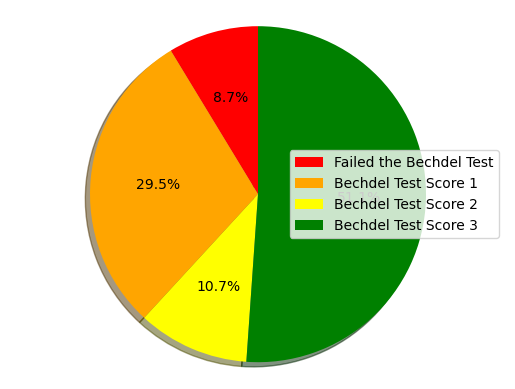

In [35]:
#pie chart of the bechdel test score of oscar winning movies

import matplotlib.pyplot as plt
topic = ["Failed the Bechdel Test", "Bechdel Test Score 1", "Bechdel Test Score 2", "Bechdel Test Score 3"]
Postive_percentage = [bt_oscars_0, bt_oscars_1, bt_oscars_2, bt_oscars_3]


sizes = Postive_percentage
print(sizes)
labels = list(topic)
print(labels)
colors = ['red', 'orange', 'yellow', 'green']
plt.pie(sizes, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

<table>
<thead>
<tr>
<th>Score</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0</strong></td>
<td>Failed the Bechdel Test completely</td>
</tr>
<tr>
<td><strong>1</strong></td>
<td>It has to have at least two [named] women in it.</td>
</tr>
</thead>
<tbody>
<tr>
<td><strong>2</strong></td>
<td>It has to have at least two [named] women who talk to each other.</td>
</tr>
</tr>
<tr>
<td><strong>3</strong></td>
<td>It has to have at least two [named] women who talk to each other about something besides a man.</td>
</tr>
</tbody>
</table>

In [106]:
my_list = oscar_winners

number_of_oscar_winners = len(my_list)



my_list = matching_entries

number_of_matchingentries = len(my_list)


print(number_of_oscar_winners, number_of_matchingentries)

1170 587


#### Conclusion:
The result is not very reliable as I could only consider the Bechdel scores available in movies.csv - and as there were 1170 oscar winners in oscars.csv <br>
and only 587 matching entries in both files the pie chart should not be taken as complete, reliable data as it only represents roughly 50% of the oscar winners data.

## Further possible research aspects:

I would like to include the countries provided in movies.csv and maybe locate a regional tendency towards certain bechdel scores. Maybe it would also be possible to look at <br> regional trends (over time) in this regard. If I had to describe it in one research question it could be: How did the result of the Bechdel Test score of various movies <br>
develop over the past century? <br>
<br>
What would also be interesting to know would be the correspondence of the percentage of women in the crew and the resulting bechdel score - or maybe the gender of the director <br>
and the resulting bechdel score.<br>
<br>
Or if I would add on to my research-question it could also be a line chart of the relative amount of female directors over time even though I think it could prove difficult to <br>
get this information from the movies.csv file

## Bechdel score - Influences

Continuing on my "Further possible research aspects" I initially wanted to find out if there was maybe a regional tendency towards certain Bechdel scores in different countries. <br>
I quickly realized that I was not working with the right data sets to further research these questions as the Oscars tend to mostly nominate US-American films and the entries in <br>
movies.csv also mostly featured films from the US. <br>
<br>
Moving on to the differences in Bechdel scores whether the director was male or female I ran into another problem: <br>
There simply aren't many female directors that were nominated for or have won an Oscar. <br>
After I extracted and visualized the Bechdel scores of male directing winners I found out that there was only one film in matching_entries of a woman that won an Oscar for <br>
directing. This is mostly due to the recency of women starting to win Oscars for directing - the first being Kathryn Bigelow for "The Hurt Locker" in 2009. Two more women followed:<br>
Chloé Zhao for "Nomadland" (2020) and Jane Campion for "The Power of the Dog" (2021). The latter two were, at the time of using the movies.csv data, not yet included. <br>
<br>
I then began working with a complete list of all Oscar nominated AND winning directors (even if there was no matching entry for this film in movies.csv) but even with this <br>
bigger set of entries the number of female directors was too low to create meaningful comparisons.<br>


### Directors

In [ ]:
# Now extract movies that won oscars for directing from matching_entries

In [109]:
directing_only_list = []

for entry in matching_entries:
    if entry["category"] == "DIRECTING":
        directing_only_list.append(entry)

for x in directing_only_list:
    print(x)


{'year': 1929, 'category': 'DIRECTING', 'film': 'All Quiet on the Western Front', 'name': 'Lewis Milestone', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'DIRECTING', 'film': 'Skippy', 'name': 'Norman Taurog', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1932, 'category': 'DIRECTING', 'film': 'Cavalcade', 'name': 'Frank Lloyd', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1934, 'category': 'DIRECTING', 'film': 'It Happened One Night', 'name': 'Frank Capra', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1936, 'category': 'DIRECTING', 'film': 'Mr. Deeds Goes to Town', 'name': 'Frank Capra', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1937, 'category': 'DIRECTING', 'film': 'The Awful Truth', 'name': 'Leo McCarey', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1940, 'category': 'DIRECTING', 'film': 'The Grapes of Wrath', 'name': 'John Ford', 'status': 'winner', 'gender': '

In [ ]:
# now extracting only male directors

In [108]:
male_directing_winners = []

for entry in directing_only_list:
    if entry["gender"] == "male":
        male_directing_winners.append(entry)

for x in male_directing_winners:
    print(x)


{'year': 1929, 'category': 'DIRECTING', 'film': 'All Quiet on the Western Front', 'name': 'Lewis Milestone', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'DIRECTING', 'film': 'Skippy', 'name': 'Norman Taurog', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1932, 'category': 'DIRECTING', 'film': 'Cavalcade', 'name': 'Frank Lloyd', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1934, 'category': 'DIRECTING', 'film': 'It Happened One Night', 'name': 'Frank Capra', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1936, 'category': 'DIRECTING', 'film': 'Mr. Deeds Goes to Town', 'name': 'Frank Capra', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1937, 'category': 'DIRECTING', 'film': 'The Awful Truth', 'name': 'Leo McCarey', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1940, 'category': 'DIRECTING', 'film': 'The Grapes of Wrath', 'name': 'John Ford', 'status': 'winner', 'gender': '

In [94]:
#list of only the numbers of the bt score and nothing else

list_of_male_director_bt_scores = []

for row in male_directing_winners:
    list_of_male_director_bt_scores.append(row["bt_score"])

numbers = list_of_male_director_bt_scores

bt_male_directors_0 = 0
bt_male_directors_1 = 0
bt_male_directors_2 = 0
bt_male_directors_3 = 0

for num in numbers:
    if num == 0:
        bt_male_directors_0 += 1
    elif num == 1:
        bt_male_directors_1 += 1
    elif num == 2:
        bt_male_directors_2 += 1
    elif num == 3:
        bt_male_directors_3 += 1

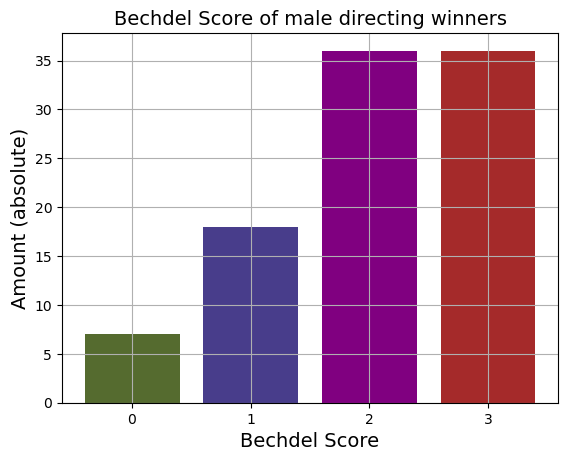

In [97]:
#bar diagram

data = {'Bechdel Score': ['0', '1', '2', '3'],
        'Amount': [bt_male_directors_0, bt_male_directors_1, bt_male_directors_3, bt_male_directors_3]
       }
df = pd.DataFrame(data)

colors = ['darkolivegreen','darkslateblue','purple','brown']
plt.bar(df['Bechdel Score'], df['Amount'], color=colors)
plt.title('Bechdel Score of male directing winners', fontsize=14)
plt.xlabel('Bechdel Score', fontsize=14)
plt.ylabel('Amount (absolute)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# now extracting female directors

In [107]:
female_directing_winners = []

for entry in directing_only_list:
    if entry["gender"] == "female":
        female_directing_winners.append(entry)

for x in female_directing_winners:
    print(x)

{'year': 2009, 'category': 'DIRECTING', 'film': 'The Hurt Locker', 'name': 'Kathryn Bigelow', 'status': 'winner', 'gender': 'female', 'bt_score': 1}


In [49]:
# as there is only one entry for female director winning an oscar in both movies.csv and oscars.csv 
# I wanted to look at the oscars.csv only to see if there is more than one woman winning an oscare for directing
# for that I have to make a dictionary of the oscars.csv 

In [60]:
#list of dictionaries
oscar_dict = []

# here we go through every row of our oscar data and transform each row to a dictionary to make it easier to acces attributes
for row in oscar_data:
        category = row[1] 
        status = row[4]
        gender = row[5]

        row_dict = {
            "category": category,
            "status": status,
            "gender": gender
        }
        
        oscar_dict.append(row_dict)
        
for r in oscar_dict:
    print(r)

{'category': 'category', 'status': 'status', 'gender': 'gender'}
{'category': 'CINEMATOGRAPHY', 'status': 'nominated', 'gender': 'male'}
{'category': 'WRITING', 'status': 'nominated', 'gender': 'male'}
{'category': 'WRITING', 'status': 'winner', 'gender': 'male'}
{'category': 'WRITING', 'status': 'nominated', 'gender': 'male'}
{'category': 'WRITING', 'status': 'winner', 'gender': 'male'}
{'category': 'WRITING', 'status': 'nominated', 'gender': 'male'}
{'category': 'WRITING', 'status': 'nominated', 'gender': 'male'}
{'category': 'CINEMATOGRAPHY', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'CINEMATOGRAPHY', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category':

In [ ]:
# extracting only directing entries

In [61]:
all_directing_only_list = []

for entry in oscar_dict:
    if entry["category"] == "DIRECTING":
        all_directing_only_list.append(entry)

for x in all_directing_only_list:
    print(x)

{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'categ

In [110]:
all_female_directors = []

for entry in all_directing_only_list:
    if entry["gender"] == "female":
        all_female_directors.append(entry)

for x in all_female_directors:
    print(x)

{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'female'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'female'}


In [69]:
all_male_directors = []

for entry in all_directing_only_list:
    if entry["gender"] == "male":
        all_male_directors.append(entry)

for x in all_male_directors:
    print(x)

{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'winner', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'category': 'DIRECTING', 'status': 'nominated', 'gender': 'male'}
{'categ

In [ ]:
# number of entries male nominees/winner and female nominees/winners

In [71]:
num_f = len(all_female_directors)
num_m = len(all_male_directors)

print(num_f, num_m, num_f/num_m)

8 447 0.017897091722595078


### Directors - Further Information

The number of entries in all_female_directors and all_male_directors does not represent the number of women and men nominated and/or winning an Oscar for directing. <br>
There were not 8 but 7 women ever nominates/winning an Oscar in this category. The higher number is due to Jane Campion being nominated for "The Piano" in 1994 as well as <br>
winning an Oscar for a different film in 2021.

### Writers

I decided to repeat this experiment with the gender of the Oscar winning writers. Once again this proved difficult for the small number of female Oscar winners in this category. <br>
I also tried finding out the relation of female to male nominees vs. winners which turned out to slightly differ from each other.

In [ ]:
# extracting all writing entries from matching_entries

In [72]:
writing_only_list = []

for entry in matching_entries:
    if entry["category"] == "WRITING":
        writing_only_list.append(entry)

for x in writing_only_list:
    print(x)


{'year': 1927, 'category': 'WRITING', 'film': 'Underworld', 'name': 'Ben Hecht', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1928, 'category': 'WRITING', 'film': 'The Patriot', 'name': 'Hans Kraly', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1930, 'category': 'WRITING', 'film': 'The Dawn Patrol', 'name': 'John Monk Saunders', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'WRITING', 'film': 'Cimarron', 'name': 'Howard Estabrook', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1931, 'category': 'WRITING', 'film': 'The Champ', 'name': 'Frances Marion', 'status': 'winner', 'gender': 'female', 'bt_score': 1}
{'year': 1932, 'category': 'WRITING', 'film': 'Little Women', 'name': 'Victor Heerman', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1932, 'category': 'WRITING', 'film': 'Little Women', 'name': 'Sarah Y. Mason', 'status': 'winner', 'gender': 'female', 'bt_score': 3}
{'year': 1934, 'cat

In [73]:
male_writing_winners = []

for entry in writing_only_list:
    if entry["gender"] == "male":
        male_writing_winners.append(entry)

for x in male_writing_winners:
    print(x)

{'year': 1927, 'category': 'WRITING', 'film': 'Underworld', 'name': 'Ben Hecht', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1928, 'category': 'WRITING', 'film': 'The Patriot', 'name': 'Hans Kraly', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1930, 'category': 'WRITING', 'film': 'The Dawn Patrol', 'name': 'John Monk Saunders', 'status': 'winner', 'gender': 'male', 'bt_score': 0}
{'year': 1930, 'category': 'WRITING', 'film': 'Cimarron', 'name': 'Howard Estabrook', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1932, 'category': 'WRITING', 'film': 'Little Women', 'name': 'Victor Heerman', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1934, 'category': 'WRITING', 'film': 'It Happened One Night', 'name': 'Robert Riskin', 'status': 'winner', 'gender': 'male', 'bt_score': 3}
{'year': 1937, 'category': 'WRITING', 'film': 'The Life of Emile Zola', 'name': 'Heinz Herald', 'status': 'winner', 'gender': 'male', 'bt_score': 1}
{'ye

In [74]:
female_writing_winners = []

for entry in writing_only_list:
    if entry["gender"] == "female":
        female_writing_winners.append(entry)

for x in female_writing_winners:
    print(x)

{'year': 1931, 'category': 'WRITING', 'film': 'The Champ', 'name': 'Frances Marion', 'status': 'winner', 'gender': 'female', 'bt_score': 1}
{'year': 1932, 'category': 'WRITING', 'film': 'Little Women', 'name': 'Sarah Y. Mason', 'status': 'winner', 'gender': 'female', 'bt_score': 3}
{'year': 1938, 'category': 'WRITING', 'film': 'Boys Town', 'name': 'Eleanore Griffin', 'status': 'winner', 'gender': 'female', 'bt_score': 0}
{'year': 1938, 'category': 'WRITING', 'film': 'Boys Town', 'name': 'Dore Schary', 'status': 'winner', 'gender': 'female', 'bt_score': 0}
{'year': 1942, 'category': 'WRITING', 'film': 'Mrs. Miniver', 'name': 'Claudine West', 'status': 'winner', 'gender': 'female', 'bt_score': 3}
{'year': 1946, 'category': 'WRITING', 'film': 'The Seventh Veil', 'name': 'Muriel Box', 'status': 'winner', 'gender': 'female', 'bt_score': 3}
{'year': 1985, 'category': 'WRITING', 'film': 'Witness', 'name': 'Pamela Wallace', 'status': 'winner', 'gender': 'female', 'bt_score': 3}
{'year': 1986, 

In [75]:
num_f_w = len(female_writing_winners)
num_m_w = len(male_writing_winners)

print(num_f_w, num_m_w, num_f_w/num_m_w)

13 162 0.08024691358024691


In [ ]:
#bt_score analysis by gender of the writer

In [115]:
#list of only the numbers of the bt score and nothing else

list_of_male_writer_bt_scores = []

for row in male_writing_winners:
    list_of_male_writer_bt_scores.append(row["bt_score"])
    
#how often each score is in the list
numbers = list_of_male_writer_bt_scores

bt_male_writing_0 = 0
bt_male_writing_1 = 0
bt_male_writing_2 = 0
bt_male_writing_3 = 0

for num in numbers:
    if num == 0:
        bt_male_writing_0 += 1
    elif num == 1:
        bt_male_writing_1 += 1
    elif num == 2:
        bt_male_writing_2 += 1
    elif num == 3:
        bt_male_writing_3 += 1

print("How many films failed the Bechdel test:", bt_male_writing_0)
print("How many films had at least two named women in it:", bt_male_writing_1)
print("How many films had two named women that talked to each other:", bt_male_writing_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bt_male_writing_3)

How many films failed the Bechdel test: 8
How many films had at least two named women in it: 51
How many films had two named women that talked to each other: 20
How many films had two named women that talked to each other about anything that isn't a man: 83


In [116]:
#list of only the numbers of the bt score and nothing else

list_of_female_writer_bt_scores = []

for row in female_writing_winners:
    list_of_female_writer_bt_scores.append(row["bt_score"])
    
#how often each score is in the list
numbers = list_of_female_writer_bt_scores

bt_female_writing_0 = 0
bt_female_writing_1 = 0
bt_female_writing_2 = 0
bt_female_writing_3 = 0

for num in numbers:
    if num == 0:
        bt_female_writing_0 += 1
    elif num == 1:
        bt_female_writing_1 += 1
    elif num == 2:
        bt_female_writing_2 += 1
    elif num == 3:
        bt_female_writing_3 += 1

print("How many films failed the Bechdel test:", bt_female_writing_0)
print("How many films had at least two named women in it:", bt_female_writing_1)
print("How many films had two named women that talked to each other:", bt_female_writing_2)
print("How many films had two named women that talked to each other about anything that isn't a man:", bt_female_writing_3)

How many films failed the Bechdel test: 2
How many films had at least two named women in it: 1
How many films had two named women that talked to each other: 1
How many films had two named women that talked to each other about anything that isn't a man: 9


In [118]:
total_count_m_writer = bt_male_writing_0 + bt_male_writing_1 + bt_male_writing_2 + bt_male_writing_3
total_count_f_writer = bt_female_writing_0 + bt_female_writing_1 + bt_female_writing_2 + bt_female_writing_3

normalized_count_m_writer_0 = bt_male_writing_0 / total_count_m_writer
normalized_fem_writer_0 = bt_female_writing_0 / total_count_f_writer
normalized_count_m_writer_1 = bt_male_writing_1 / total_count_m_writer
normalized_fem_writer_1 = bt_female_writing_1 / total_count_f_writer
normalized_count_m_writer_2 = bt_male_writing_2 / total_count_m_writer
normalized_fem_writer_2 = bt_female_writing_2 / total_count_f_writer
normalized_count_m_writer_3 = bt_male_writing_3 / total_count_m_writer
normalized_fem_writer_3 = bt_female_writing_3 / total_count_f_writer

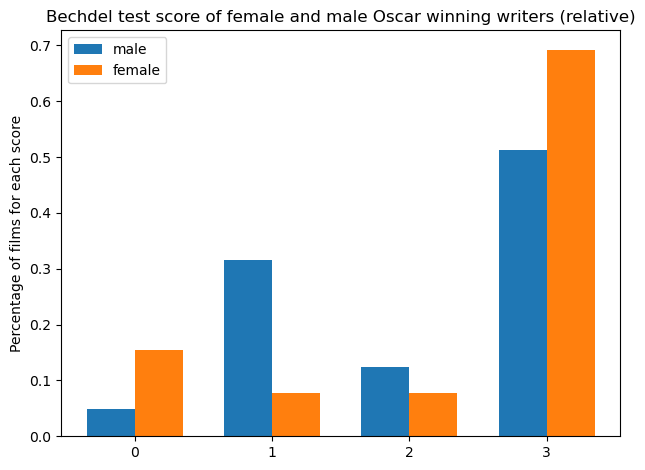

In [130]:
labels = ['0', '1', '2', '3']
Male_Writer = [normalized_count_m_writer_0, normalized_count_m_writer_1, normalized_count_m_writer_2, normalized_count_m_writer_3]
Female_Writer = [normalized_fem_writer_0, normalized_fem_writer_1, normalized_fem_writer_2, normalized_fem_writer_3]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Male_Writer, width, label='male')
rects2 = ax.bar(x + width/2, Female_Writer, width, label='female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of films for each score')
ax.set_title('Bechdel test score of female and male Oscar winning writers (relative)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig.tight_layout()

plt.show()

In [142]:
#calculating the number of people

all_writing_only_list = []

for entry in oscar_dict:
    if entry["category"] == "WRITING":
        all_writing_only_list.append(entry)


all_female_writers = []

for entry in all_writing_only_list:
    if entry["gender"] == "female":
        all_female_writers.append(entry)


all_male_writers = []

for entry in all_writing_only_list:
    if entry["gender"] == "male":
        all_male_writers.append(entry)
        
num_f_writ = len(all_female_writers)
num_m_writ = len(all_male_writers)
num_m_writ_w = len(male_writing_winners)
num_f_writ_w = len(female_writing_winners)
print(num_f_writ, num_m_writ, num_f_writ_w, num_m_writ_w)

180 1456 13 162


In [144]:
#how many nominated women/men actually win an Oscar

percentage_winning_f = (num_f_writ_w/num_f_writ)*100
percentage_winning_m = (num_m_writ_w/num_m_writ)*100

print(percentage_winning_f, percentage_winning_m)

7.222222222222221 11.126373626373626


In [156]:
num_all_writ = num_f_writ + num_m_writ
num_all_writ_w = num_f_writ_w + num_m_writ_w

percent_num_f_writ = (num_f_writ/num_all_writ)*100
percent_num_m_writ = (num_m_writ/num_all_writ)*100
percent_num_f_writ_w = (num_f_writ_w/num_all_writ_w)*100
percent_num_m_writ_w = (num_m_writ_w/num_all_writ_w)*100

print(percent_num_f_writ, percent_num_m_writ, percent_num_f_writ_w, percent_num_m_writ_w)

11.00244498777506 88.99755501222494 7.428571428571429 92.57142857142857


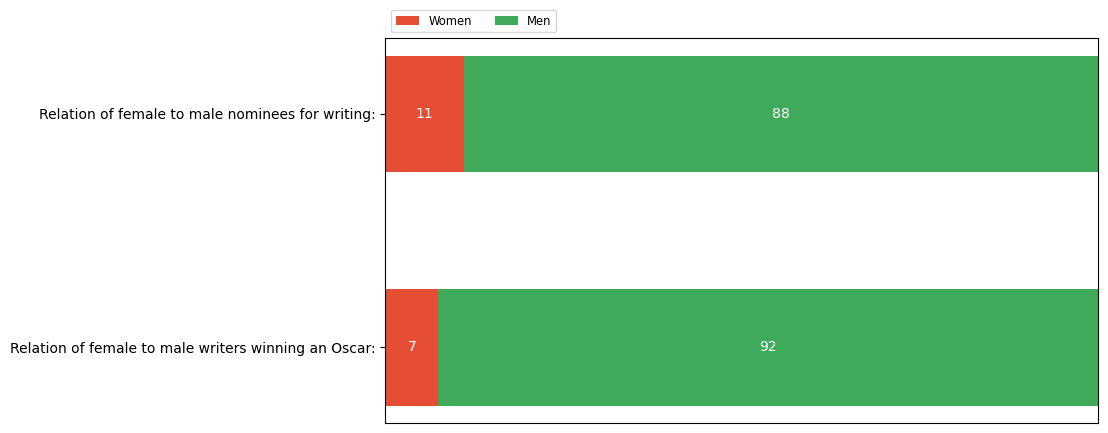

In [160]:
category_names = ['Women', 'Men']
results = {
    'Relation of female to male nominees for writing:': [percent_num_f_writ, percent_num_m_writ],
    'Relation of female to male writers winning an Oscar:': [percent_num_f_writ_w, percent_num_m_writ_w]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

### Writers - Conclusion

### Oscar Winners

all_writing_only_list// all_female_writers, all_male_writers// nnumfw, nnummw <br>
all_directing_only_list// all_female_directors, all_male_directors// nnumfd, nnummd<br>
all_bestpicture_only_list// all_female_bestpicture, all_male_bestpicture // nnumfbp, nnummbp<br>
all_filmediting_only_list// all_female_filmediting, all_male_filmediting // nnumffe, nnummfe<br>
all_cinematography_only_list// all_female_cinematography, all_male_cinematography // nnumfc, nnummc<br>
all_shortfilm_only_list// all_female_shortfilm, all_male_shortfilm // nnumfsf, nnummsf<br>
all_costumedesign_only_list// all_female_costumedesign, all_male_costumedesign // nnumfcd, nnummcd<br>

In [169]:
#best picture

all_bestpicture_only_list = []

for entry in oscar_dict:
    if entry["category"] == "BEST PICTURE":
        all_bestpicture_only_list.append(entry)
        
all_male_bestpicture = []

for entry in all_bestpicture_only_list:
    if entry["gender"] == "male":
        all_male_bestpicture.append(entry)  
        
all_female_bestpicture = []

for entry in all_bestpicture_only_list:
    if entry["gender"] == "female":
        all_female_bestpicture.append(entry)  
        
        
#film editing

all_filmediting_only_list = []

for entry in oscar_dict:
    if entry["category"] == "FILM EDITING":
        all_filmediting_only_list.append(entry)

all_male_filmediting = []

for entry in all_filmediting_only_list:
    if entry["gender"] == "male":
        all_male_filmediting.append(entry)  
        
all_female_filmediting = []

for entry in all_filmediting_only_list:
    if entry["gender"] == "female":
        all_female_filmediting.append(entry)  
        
# cinematography
        
all_cinematography_only_list = []

for entry in oscar_dict:
    if entry["category"] == "CINEMATOGRAPHY":
        all_cinematography_only_list.append(entry)
        
        
all_male_cinematography = []

for entry in all_cinematography_only_list:
    if entry["gender"] == "male":
        all_male_cinematography.append(entry)  
        
all_female_cinematography = []

for entry in all_cinematography_only_list:
    if entry["gender"] == "female":
        all_female_cinematography.append(entry)  

        
# shortfilm 

all_shortfilm_only_list = []

for entry in oscar_dict:
    if entry["category"] == "SHORT FILM":
        all_shortfilm_only_list.append(entry)
        
all_male_shortfilm = []

for entry in all_shortfilm_only_list:
    if entry["gender"] == "male":
        all_male_shortfilm.append(entry)  
        
all_female_shortfilm = []

for entry in all_shortfilm_only_list:
    if entry["gender"] == "female":
        all_female_shortfilm.append(entry)          
        
        
# costume design

all_costumedesign_only_list = []

for entry in oscar_dict:
    if entry["category"] == "COSTUME DESIGN":
        all_costumedesign_only_list.append(entry)
        
        
all_male_costumedesign = []

for entry in all_costumedesign_only_list:
    if entry["gender"] == "male":
        all_male_costumedesign.append(entry)  
        
all_female_costumedesign = []

for entry in all_costumedesign_only_list:
    if entry["gender"] == "female":
        all_female_costumedesign.append(entry)  

In [177]:
numfw = len(all_female_writers)
nummw = len(all_male_writers)

allnumw = numfw + nummw

nnumfw = (numfw/allnumw)*100
nnummw = (nummw/allnumw)*100

#

numfd = len(all_female_directors)
nummd = len(all_male_directors)

allnumd = numfd + nummd

nnumfd = (numfd/allnumd)*100
nnummd = (nummd/allnumd)*100

#

numfbp = len(all_female_bestpicture)
nummbp = len(all_male_bestpicture)

allnumbp = numfbp + nummbp

nnumfbp = (numfbp/allnumbp)*100
nnummbp = (nummbp/allnumbp)*100

#

numffe = len(all_female_filmediting)
nummfe = len(all_male_filmediting)

allnumfe = numffe + nummfe

nnumffe = (numffe/allnumfe)*100
nnummffe = (nummfe/allnumfe)*100

#

numfc = len(all_female_cinematography)
nummc = len(all_male_cinematography)

allnumc = numfc + nummc

nnumfc = (numfc/allnumc)*100
nnummc = (nummc/allnumc)*100

#

numfsf = len(all_female_shortfilm)
nummsf = len(all_male_shortfilm)

allnumsf = numfsf + nummsf

nnumfsf = (numfsf/allnumsf)*100
nnummsf = (nummsf/allnumsf)*100
           
#

numfcd = len(all_female_costumedesign)
nummcd = len(all_male_costumedesign)
           
allnumcd = numfcd + nummcd
           
nnumcfd = (numfcd/allnumcd)*100
nnummcd = (nummcd/allnumcd)*100

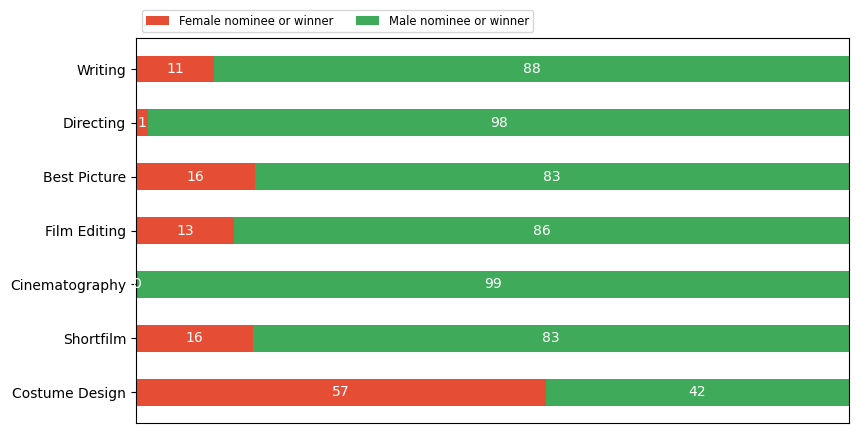

In [181]:
category_names = ['Female nominee or winner', 'Male nominee or winner']

results = {
    'Writing': [nnumfw, nnummw],
    'Directing': [nnumfd, nnummd],
    'Best Picture': [nnumfbp, nnummbp],
    'Film Editing': [nnumffe, nnummffe],
    'Cinematography': [nnumfc, nnummc],
    'Shortfilm': [nnumfsf, nnummsf],
    'Costume Design': [nnumcfd, nnummcd]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()